In [19]:
from dlp_qc_utils.concordance.sv_hmm_concordance import get_cna_changepoints, get_local_breakpoints,flatten_matched_breakpoints,get_discordant_svs, get_concordance,split_concordance,read_matched_data, check_changepoints_against_matches, get_concordant_svs
from dlp_qc_utils.plots.breakpoint_plots import plot_cn_changepoints
from wgs_analysis.plots.rearrangement import chromosome_type_plot
from single_cell.workflows.pseudo_bulk_qc.scripts.single_cell_qc_plots import load_qc_data
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:
#read hmmcopy data and filter using scgenome
sample_id = "SA1256PP"
library_id = "A108838B"

annotation_metrics= "/juno/work/shah/tantalus/SC-3803/results/annotation/A108838B_metrics.csv.gz"
hmmcopy_reads = "/juno/work/shah/tantalus/SC-3803/results/hmmcopy/A108838B_reads.csv.gz"
hmmcopy_segs = "/juno/work/shah/tantalus/SC-3803/results/hmmcopy/A108838B_segments.csv.gz"
hmmcopy_metrics = "/juno/work/shah/tantalus/SC-3803/results/hmmcopy/A108838B_hmmcopy_metrics.csv.gz"
alignment_metrics = "/juno/work/shah/tantalus/SC-3803/results/align/A108838B_alignment_metrics.csv.gz"
gc_metrics = "/juno/work/shah/tantalus/SC-3803/results/align/A108838B_gc_metrics.csv.gz"

metrics_data, cn_data_filt = load_qc_data(
        sample_id, annotation_metrics, hmmcopy_reads,
        hmmcopy_segs, hmmcopy_metrics, alignment_metrics, gc_metrics)

cn_data_filt = cn_data_filt.dropna()


/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/scgenome-0.0.1-py3.6.egg/scgenome/loaders/align.py:114: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dtypes_override = yaml.load(open(dtypes_filename))
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/scgenome-0.0.1-py3.6.egg/scgenome/loaders/align.py:119: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dtypes_override = yaml.load(open(dtypes_filename))
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/scgenome-0.0.1-py3.6.egg/scgenome/loaders/hmmcopy.py:160: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  dtypes_override = ya




 METRICS       multiplier  MSRSI_non_integerness  MBRSI_dispersion_non_integerness  \
51             2           1.083091e-06                      6.088034e-07   
52             1           8.336213e-08                      7.155118e-08   
53             2           6.666619e-02                      6.666590e-02   
54             1           1.446669e-01                      4.335491e-01   
55             2           4.305503e-02                      1.567267e-01   
56             3           1.727338e-01                      1.417508e+00   
57             2           1.982811e-02                      1.362461e-01   
58             2           3.006065e-02                      1.520642e-01   
59             1           1.545140e-01                      4.811221e-01   
60             2           2.148657e-02                      1.521201e-01   
61             2           4.936191e-02                      2.872042e-01   
62             2           2.181139e-02                      1.4

/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [21]:
#get changepoints
changepoints = get_cna_changepoints(cn_data_filt)

/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/dlp_qc_utils-0+untagged.8.g6656ef9.dirty-py3.6.egg/dlp_qc_utils/plots/breakpoint_plots.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/dlp_qc_utils-0+untagged.8.g6656ef9.dirty-py3.6.egg/dlp_qc_utils/plots/breakpoint_plots.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/dlp_qc_utils-0+untagged.8.g6656ef9.dirty-py3.6.egg/dlp

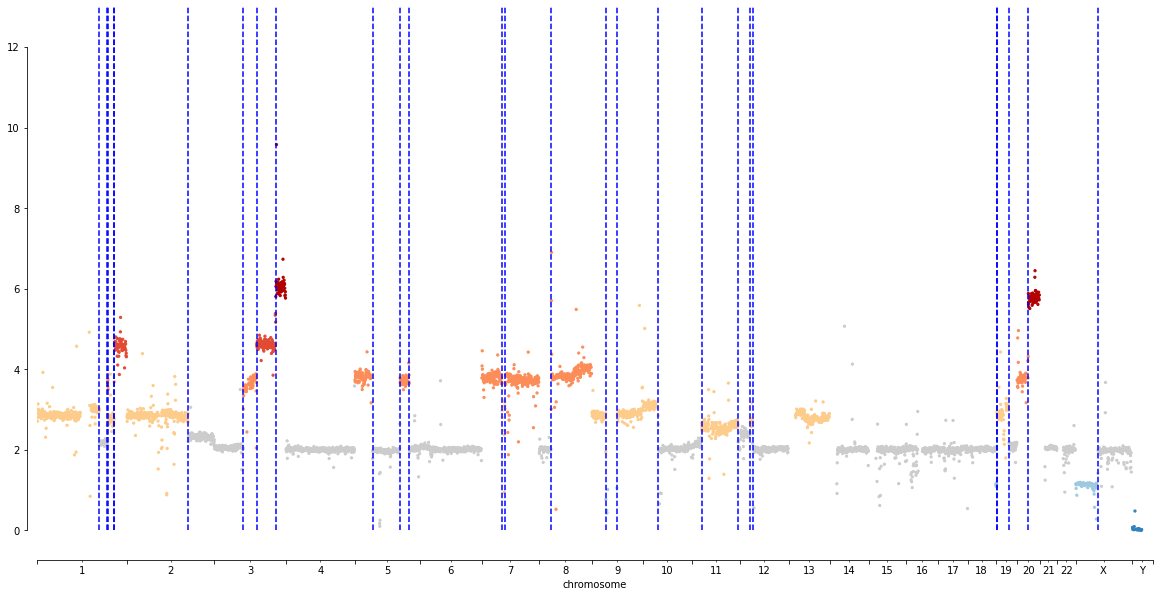

In [22]:
f, ax = plt.subplots(figsize=(20,10))
plot_cn_changepoints(ax, cn_data_filt,changepoints)

In [6]:
#run concordance on lumpy
lumpy_primary="/juno/work/shah/users/grewald/SVBENCH2/reclassify/lumpy_parsed_primary_only.csv.gz"
lumpy_primary = get_concordance(lumpy_primary,changepoints, "/juno/work/shah/abramsd/RESULTS/SV_benchmarking/hmmcopy_concordance/lumpy/lumpy_primary")
lumpy_raw="/juno/work/shah/users/grewald/SVBENCH2/reclassify/lumpy_parsed_raw.csv.gz"
lumpy_raw = get_concordance(lumpy_raw,changepoints, "/juno/work/shah/abramsd/RESULTS/SV_benchmarking/hmmcopy_concordance/lumpy/lumpy_raw")
lumpy_trim="/juno/work/shah/users/grewald/SVBENCH2/reclassify/lumpy_parsed_trimming.csv.gz"
lumpy_trim = get_concordance(lumpy_trim,changepoints, "/juno/work/shah/abramsd/RESULTS/SV_benchmarking/hmmcopy_concordance/lumpy/lumpy_trim")
lumpy_trim_primary="/juno/work/shah/users/grewald/SVBENCH2/reclassify/lumpy_parsed_trimming_primary_only.csv.gz"
lumpy_trim_primary = get_concordance(lumpy_trim_primary,changepoints, "/juno/work/shah/abramsd/RESULTS/SV_benchmarking/hmmcopy_concordance/lumpy/lumpy_trim_primary")


HMM-concordant: 0/2251, 0.0%
HMM-concordant: 3/12683, 0.023653709690136405%
HMM-concordant: 3/12477, 0.024044241404183698%
HMM-concordant: 0/2230, 0.0%


In [23]:
import pandas as pd

unfilt=pd.read_csv(hmmcopy_reads)

In [24]:
changepoints_unfilt = get_cna_changepoints(unfilt)


/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/dlp_qc_utils-0+untagged.8.g6656ef9.dirty-py3.6.egg/dlp_qc_utils/plots/breakpoint_plots.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/dlp_qc_utils-0+untagged.8.g6656ef9.dirty-py3.6.egg/dlp_qc_utils/plots/breakpoint_plots.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/abramsd/miniconda3/envs/r-environment/lib/python3.6/site-packages/dlp_qc_utils-0+untagged.8.g6656ef9.dirty-py3.6.egg/dlp

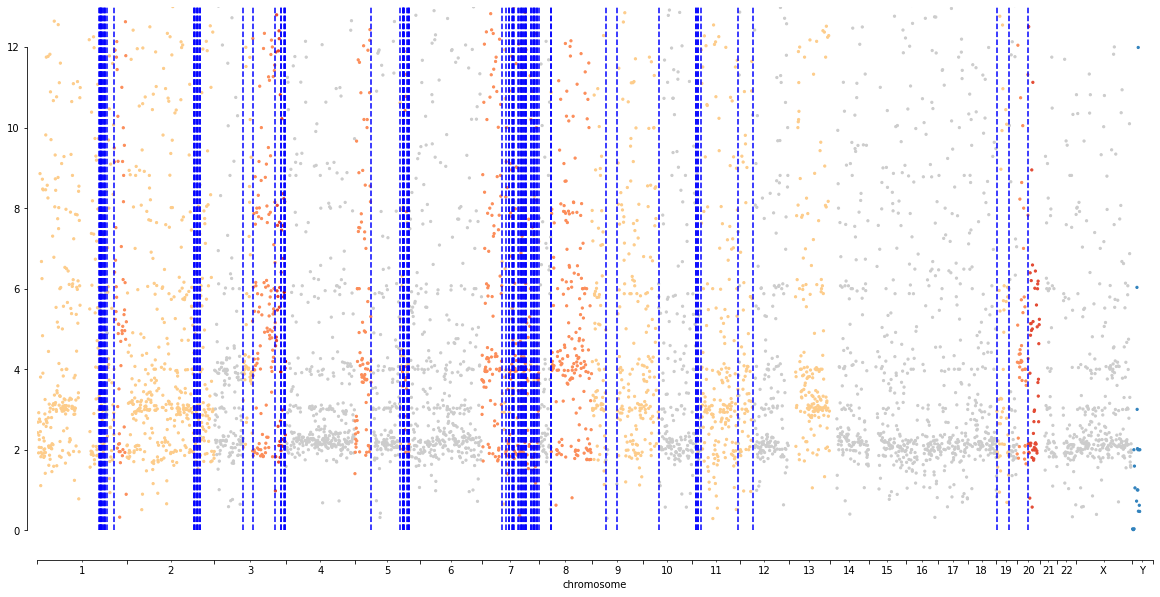

In [26]:
%matplotlib inline
f, ax = plt.subplots(figsize=(20,10))

plot_cn_changepoints(ax, unfilt, changepoints_unfilt)


In [27]:
lumpy_trim="/juno/work/shah/users/grewald/SVBENCH2/reclassify/lumpy_parsed_trimming.csv.gz"
lumpy_trim = get_concordance(lumpy_trim,changepoints, "/juno/work/shah/abramsd/RESULTS/SV_benchmarking/hmmcopy_concordance/lumpy/lumpy_trim")

HMM-concordant: 3/12477, 0.024044241404183698%
